## IMPORT LIBRARIES

In [25]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import pickle



# LOAD AND SHOW DATA

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/Sumit-saha12/Shipment-price-prediction/main/SCMS_Delivery_History_Dataset.csv")
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## OVERVIEW DATA

In [27]:
print('Total number of rows: ',data.shape[0])
print('Total number of column :',data.shape[1])
data.dtypes

Total number of rows:  10324
Total number of column : 33


ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


## DROP COLUMNS

In [28]:
data=data.drop(['Vendor','Item Description','Molecule/Test Type'],axis=1)
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## DATA CLEAN

The above lines of code perform data cleaning and filtering operations on a dataset.

The first line filters the dataset to remove rows where the value in the 'First Line Designation' column is equal to 'No'.
The second line filters the dataset to remove rows where the value in the 'Weight (Kilograms)' column is equal to 'Weight Captured Separately'.
The next three lines filter the dataset to remove rows where the value in the 'Freight Cost (USD)' column is equal to 'Freight Included in Commodity Cost' or 'Invoiced Separately'.
Finally, the last line drops rows with missing values in the 'Line Item Insurance (USD)' column and returns the resulting dataset with the remaining rows. The 'head()' method is used to display the first few rows of the filtered dataset.

In [29]:
data = data.query("`First Line Designation` != 'No' and \
                    `Weight (Kilograms)` != 'Weight Captured Separately' and \
                    `Freight Cost (USD)` not in ['Freight Included in Commodity Cost', 'Invoiced Separately']")


data=data.dropna(subset=['Line Item Insurance (USD)'])
data.head()


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,92,102-NG-T01,Pre-PQ Process,SCMS-592,ASN-485,Nigeria,PMO - US,Direct Drop,EXW,Air,...,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
24,130,100-HT-T01,Pre-PQ Process,SCMS-10080,ASN-628,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,750,53992.5,71.99,0.72,Inverness Japan,Yes,171,3518.38,86.39
25,134,100-HT-T01,Pre-PQ Process,SCMS-10130,ASN-616,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,25,8750.0,350.00,3.50,"Pacific Biotech, Thailand",Yes,60,3097.85,14.00


Convert import datas object to numerics

The above lines of code perform data type conversion on two columns in the dataset and check the data types of all columns in the resulting dataset.

The first line converts the data type of the 'Weight (Kilograms)' column from object to numeric using the 'pd.to_numeric()' function. This is done to ensure that the column contains numerical values that can be used in calculations and analysis.

The second line converts the data type of the 'Freight Cost (USD)' column from object to numeric using the 'pd.to_numeric()' function. This is done for the same reason as above.

The third line uses the 'dtypes' attribute to check the data types of all columns in the resulting dataset after the type conversion. The 'dtypes' attribute returns a Series object that shows the data type of each column in the dataset. This is useful for verifying that the type conversion was successful and ensuring that the data types are appropriate for the intended analysis.

In [30]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'])

data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64
Pack Price                      float64
Unit Price                      float64


In [31]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,5992.000000,5992.000000,5992.000000,5.992000e+03,5992.000000,5992.000000,5992.000000,5992.000000,5992.00000
mean,51573.725467,76.333611,21917.236482,1.953564e+05,23.928667,0.756891,3273.743825,11272.019543,296.92088
std,31196.405043,79.540002,43486.860613,3.773931e+05,46.380587,4.110614,7039.340764,15965.589608,553.33782
min,92.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.00000
25%,15735.250000,30.000000,1000.000000,1.041875e+04,4.300000,0.090000,216.750000,2181.512500,15.83000
50%,57962.500000,60.000000,4927.000000,5.982163e+04,9.500000,0.160000,1093.500000,6011.310000,90.53500
75%,83228.250000,100.000000,23125.000000,2.267010e+05,27.000000,0.660000,3416.000000,14547.550000,336.57000
max,86815.000000,1000.000000,619999.000000,5.951990e+06,1250.000000,238.650000,154780.000000,289653.200000,7708.44000


## ANALYSIS OF DATA

Creating data for analysis

Here are the changes made in the code:

In the calculation of total_Freight_Cost and total_weight, the code now excludes the rows where the corresponding column value is 'Freight Included in Commodity Cost' or 'Weight Captured Separately' respectively.
The .sum() method is used to calculate the summary statistics in country_summary instead of .groupby().sum(). Also, the columns 'Freight Cost (USD)' and 'Weight (Kilograms)' are not included in the index of the resulting DataFrame.
In the calculation of top_ten_country_by_freight_cost, the code now excludes the rows where the 'Freight Cost (USD)' column value is 'Freight Included in Commodity Cost'.
The mf_summary DataFrame now uses nunique() instead of count() to count the number of unique orders.

In [32]:
# Number of unique orders
order = data['PO / SO #'].nunique()

# Total number of orders
total_order = data['PO / SO #'].count()

# Number of duplicate orders
duplicate_orders = total_order - order

# Total number of unique projects
total_unique_projects = data['Project Code'].nunique()

# Total freight cost
total_Freight_Cost = data.loc[data['Freight Cost (USD)'] != 'Freight Included in Commodity Cost', 'Freight Cost (USD)'].astype(float).sum()

# Total weight
total_weight = data.loc[data['Weight (Kilograms)'] != 'Weight Captured Separately', 'Weight (Kilograms)'].astype(float).sum()

# Average freight cost per unique order
avg_freight_cost_uniqueorder = total_Freight_Cost / order

# Average weight per unique order
avg_weight_uniqueorder = total_weight / order

# Number of unique countries
unique_country = data['Country'].nunique()

# Number of unique shipment modes
unique_shipment_mode = data['Shipment Mode'].nunique()

# Summary statistics by country and shipment mode
country_summary = data.groupby(['Shipment Mode', 'Country']).agg(
    {'PO / SO #': 'nunique', 'Freight Cost (USD)': 'sum', 'Weight (Kilograms)': 'sum'}).reset_index()
country_summary['freight_cost_by_order'] = country_summary['Freight Cost (USD)'] / country_summary['PO / SO #']

# Top 10 countries by freight cost
top_ten_country_by_freight_cost = data.loc[data['Freight Cost (USD)'] != 'Freight Included in Commodity Cost']\
    .groupby(['Country'])['Freight Cost (USD)'].sum().nlargest(10).reset_index()

# Summary statistics by manufacturing site
mf_summary = data.groupby(['Manufacturing Site']).agg({'PO / SO #': 'nunique', 'Freight Cost (USD)': 'sum'}).reset_index()


Summary of some data

In [33]:
country_summary.head()

,Shipment Mode,Country,PO / SO #,Freight Cost (USD),Weight (Kilograms),freight_cost_by_order
0,Air,Afghanistan,2,1081.05,89,540.525000
1,Air,Angola,5,30832.07,1811,6166.414000
2,Air,Benin,7,66015.17,12015,9430.738571
3,Air,Botswana,56,133841.79,23429,2390.031964
4,Air,Burundi,56,312042.32,28714,5572.184286


In [34]:
top_ten_country_by_freight_cost.head()

,Country,Freight Cost (USD)
0,Nigeria,14124084.59
1,Zambia,6050441.94
2,Côte d'Ivoire,5963185.13
3,Rwanda,5712124.62
4,Uganda,5471629.20


In [35]:
mf_summary.head()

,Manufacturing Site,PO / SO #,Freight Cost (USD)
0,ABBVIE (Abbott) France,5,25601.63
1,ABBVIE (Abbott) Logis. UK,113,925352.27
2,ABBVIE (Abbott) St. P'burg USA,1,666.66
3,ABBVIE GmbH & Co.KG Wiesbaden,14,52522.81
4,ABBVIE Ludwigshafen Germany,260,1771746.86


## DATA VISUALIZATION

DATA HISTOGRAM GRAPH

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Unit of Measure (Per Pack)'}>,
        <Axes: title={'center': 'Line Item Quantity'}>],
       [<Axes: title={'center': 'Line Item Value'}>,
        <Axes: title={'center': 'Pack Price'}>,
        <Axes: title={'center': 'Unit Price'}>],
       [<Axes: title={'center': 'Weight (Kilograms)'}>,
        <Axes: title={'center': 'Freight Cost (USD)'}>,
        <Axes: title={'center': 'Line Item Insurance (USD)'}>]],
      dtype=object)

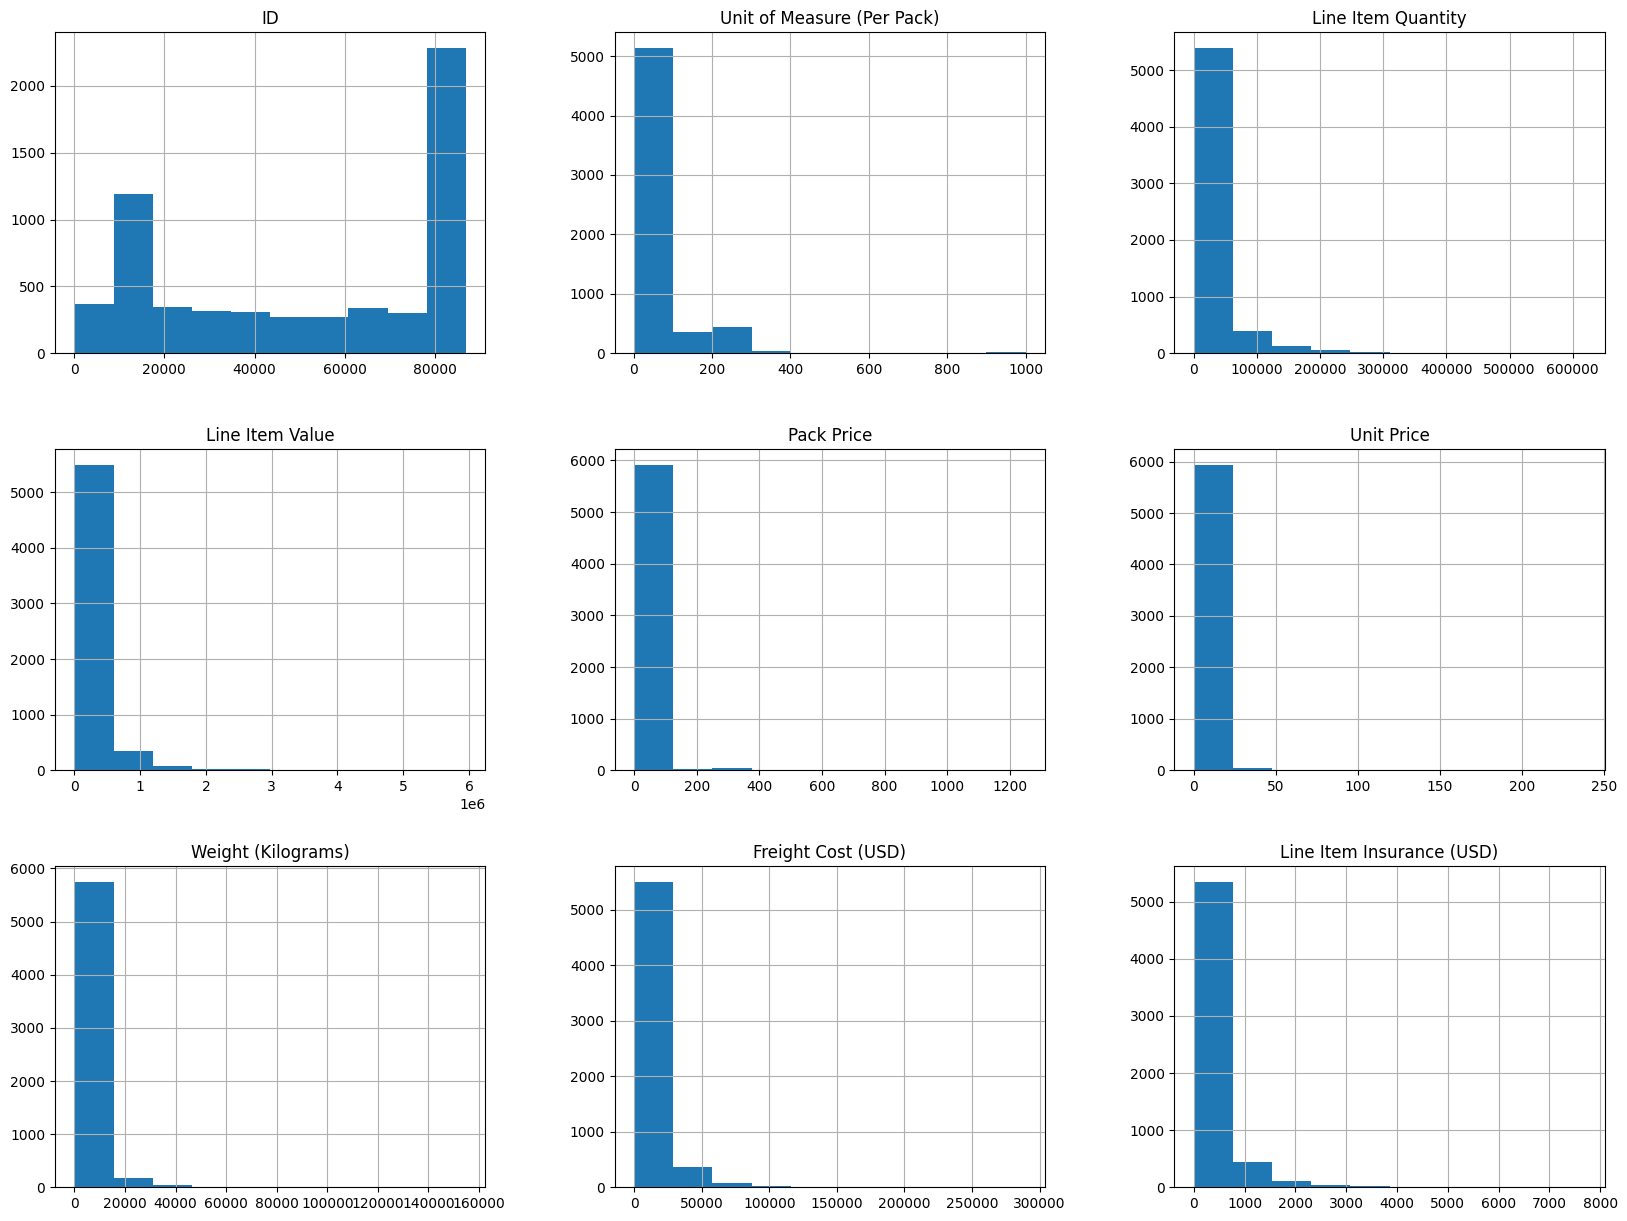

In [36]:
data.hist(figsize=(20,15))

Co-relation attributes each other

In [37]:
!pip install plotly==5.5.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


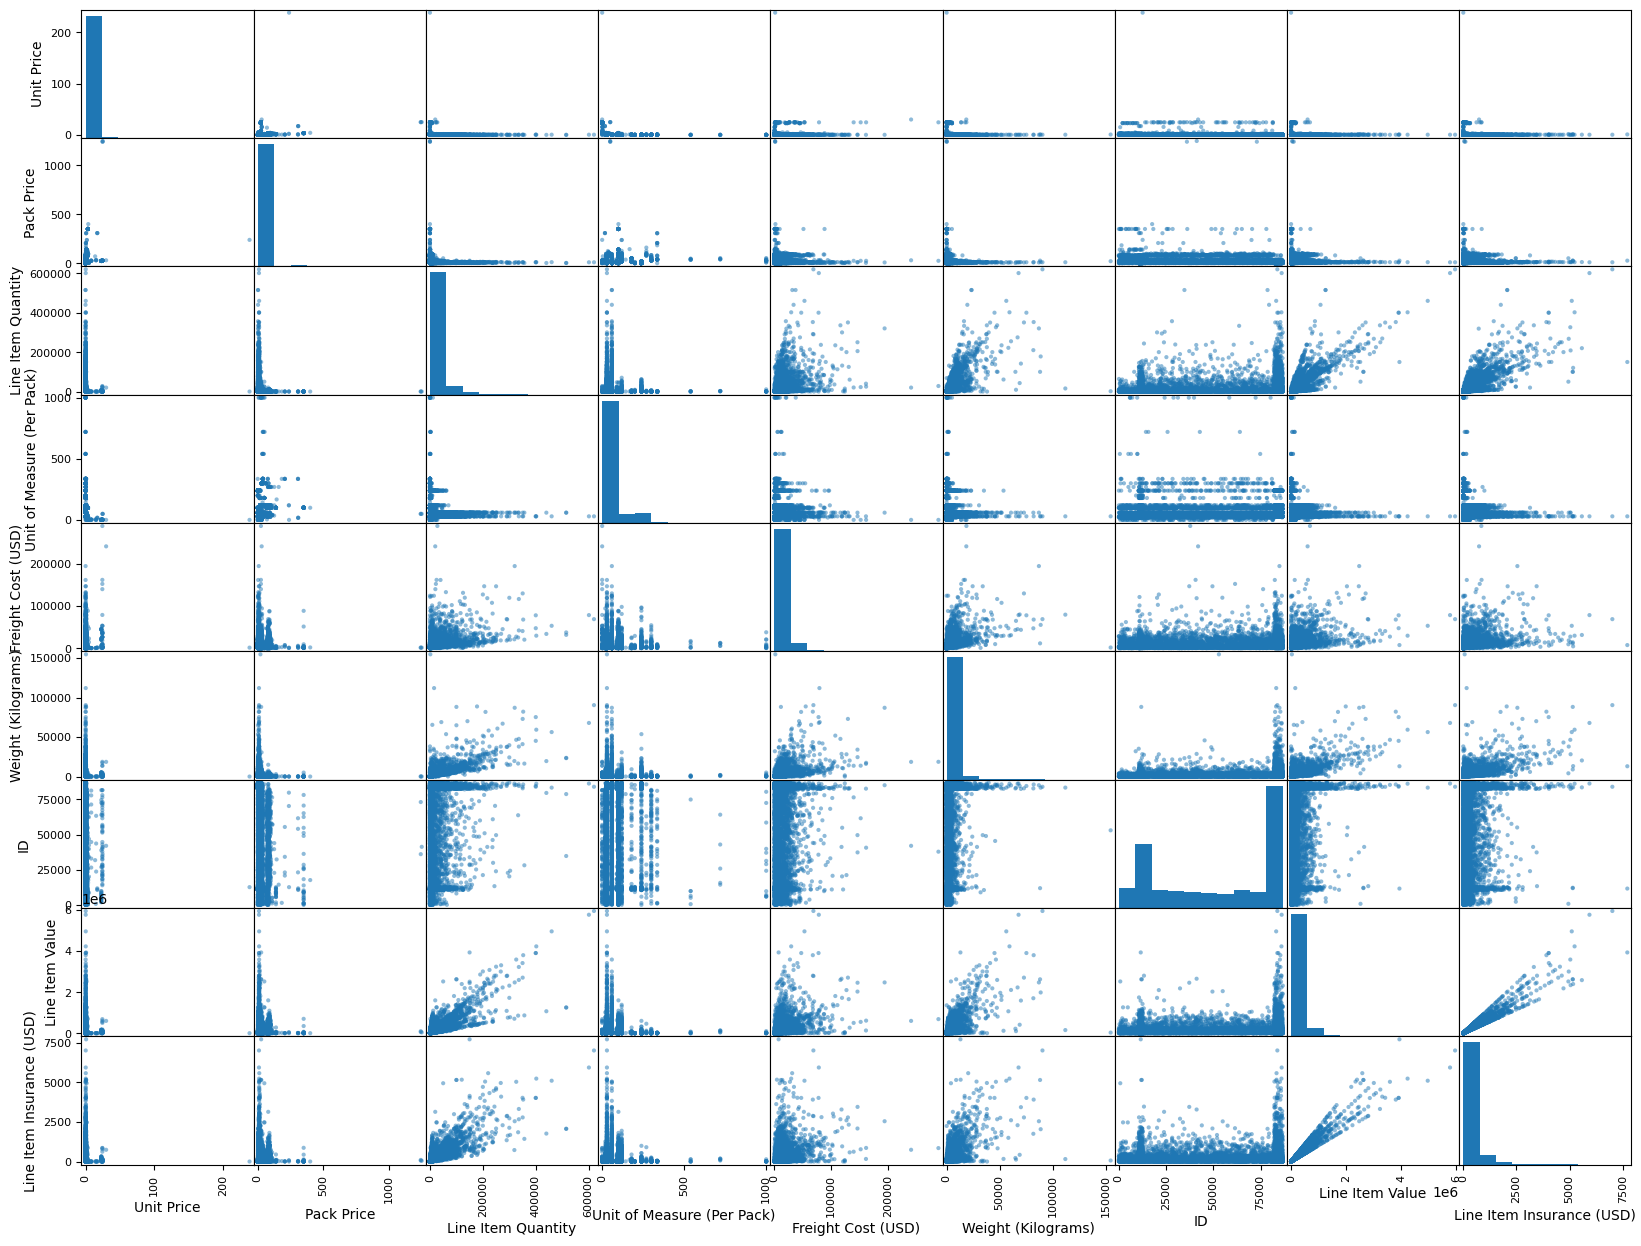

In [38]:
attributes = ['Unit Price','Pack Price','Line Item Quantity','Unit of Measure (Per Pack)','Freight Cost (USD)','Weight (Kilograms)','ID','Line Item Value','Line Item Insurance (USD)']
scatter_matrix(data[attributes],figsize=(20,15))
import plotly.graph_objs as go



Checking outlier by boxplot

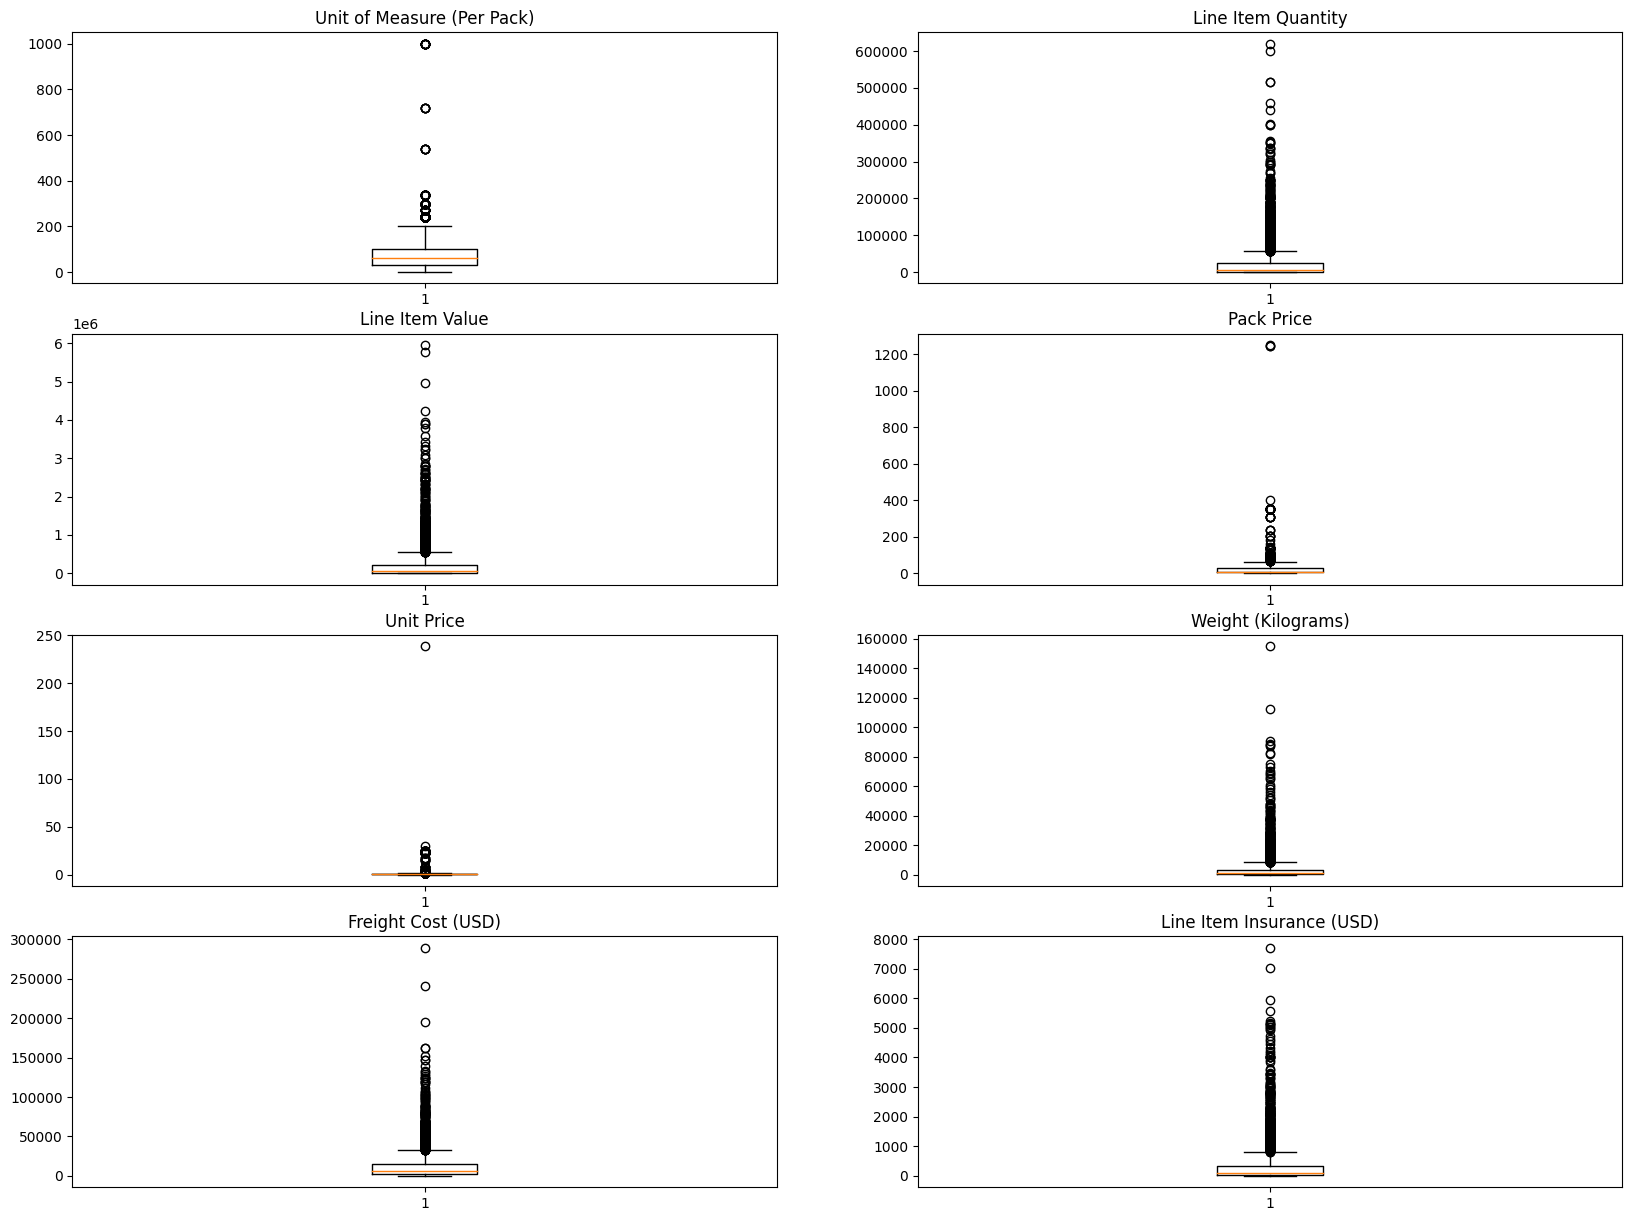

In [39]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2,figsize=(20,15))
ax1.boxplot(data['Unit of Measure (Per Pack)'])
ax1.set_title('Unit of Measure (Per Pack)')
ax2.boxplot(data['Line Item Quantity'])
ax2.set_title('Line Item Quantity')
ax3.boxplot(data['Line Item Value'])
ax3.set_title('Line Item Value')
ax4.boxplot(data['Pack Price'])
ax4.set_title('Pack Price')
ax5.boxplot(data['Unit Price'], )
ax5.set_title('Unit Price')
ax6.boxplot(data['Weight (Kilograms)'])
ax6.set_title('Weight (Kilograms)')
ax7.boxplot(data['Freight Cost (USD)'])
ax7.set_title('Freight Cost (USD)')
ax8.boxplot(data['Line Item Insurance (USD)'])
ax8.set_title('Line Item Insurance (USD)')

plt.show()


Freight_cost_by_order_by_country_order

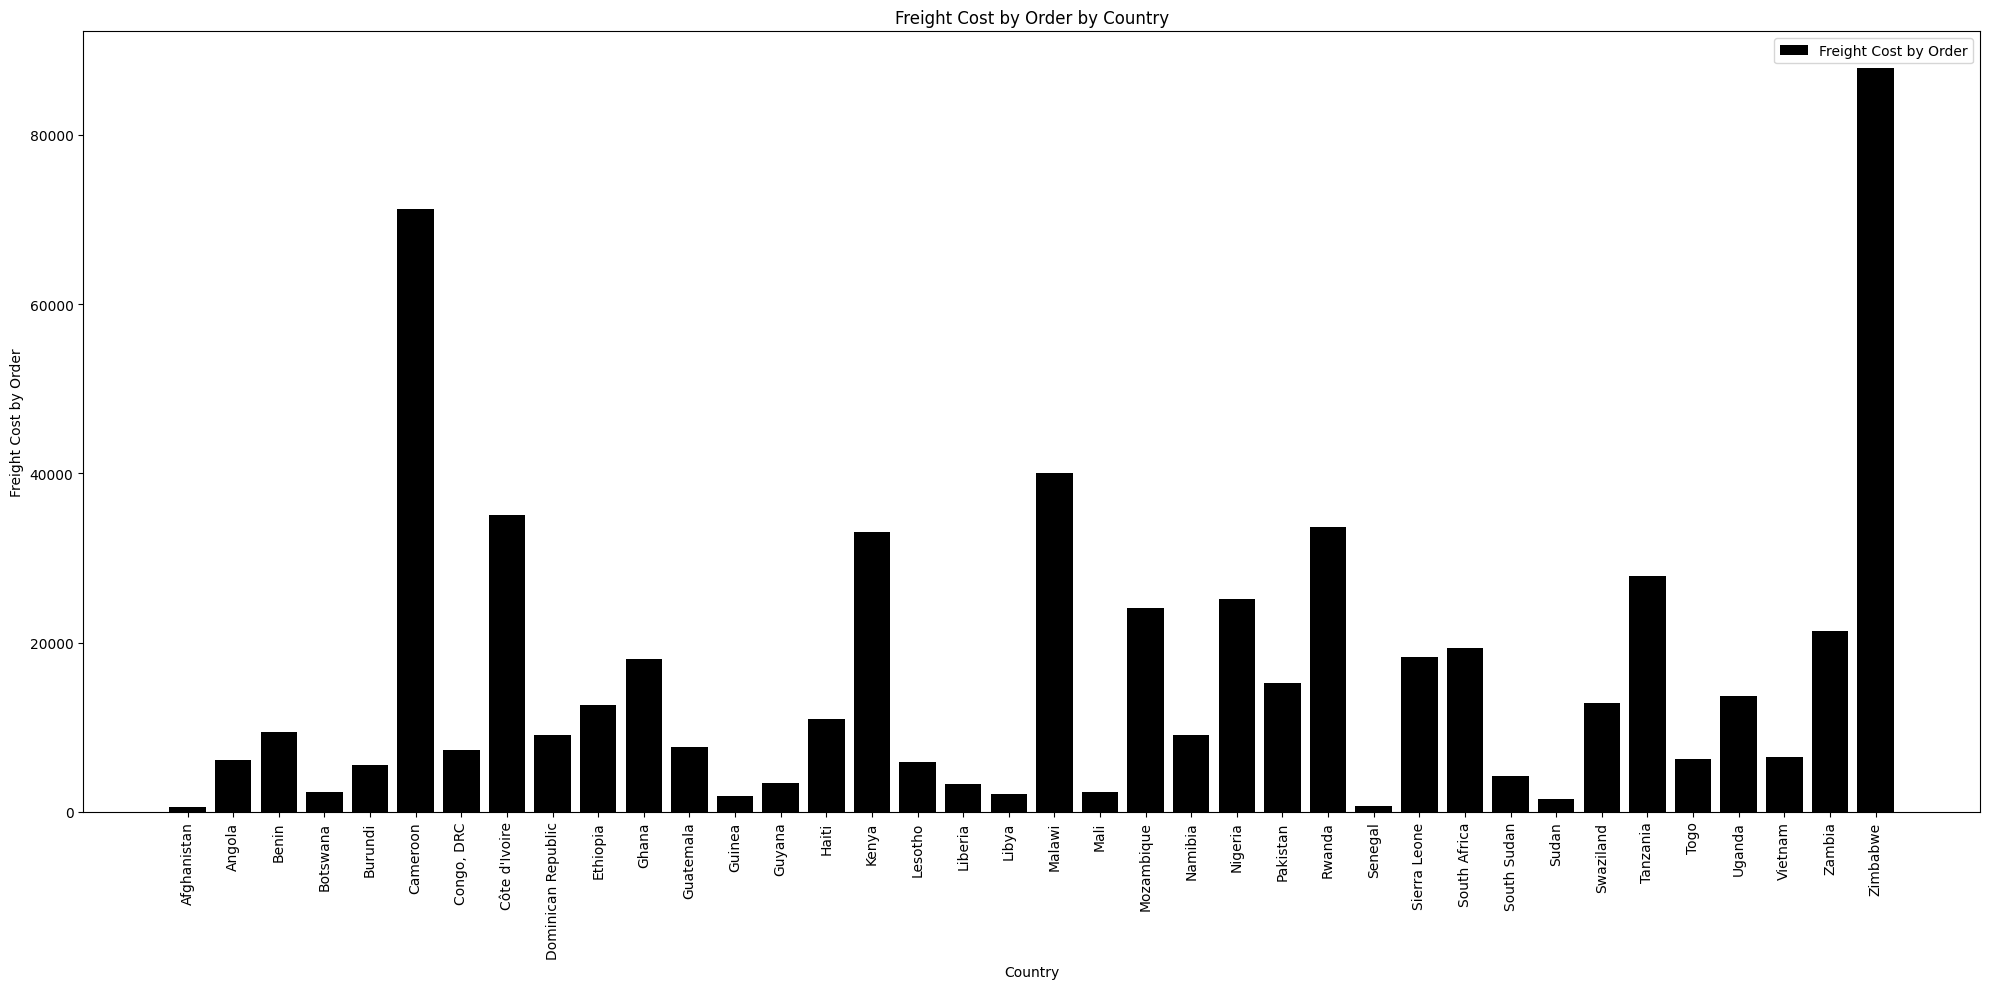

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.rc({'font.size': 18})

# Change the color of the bars to blue
plt.bar(country_summary.Country, country_summary.freight_cost_by_order, color='black')

# Add a legend
plt.legend(['Freight Cost by Order'])

plt.xticks(rotation='vertical')
plt.ylabel('Freight Cost by Order')
plt.xlabel('Country')
plt.title('Freight Cost by Order by Country')
plt.tight_layout()  # Adjust spacing between bars
plt.show()


Freight_cost_by_order_by_shipment_mode

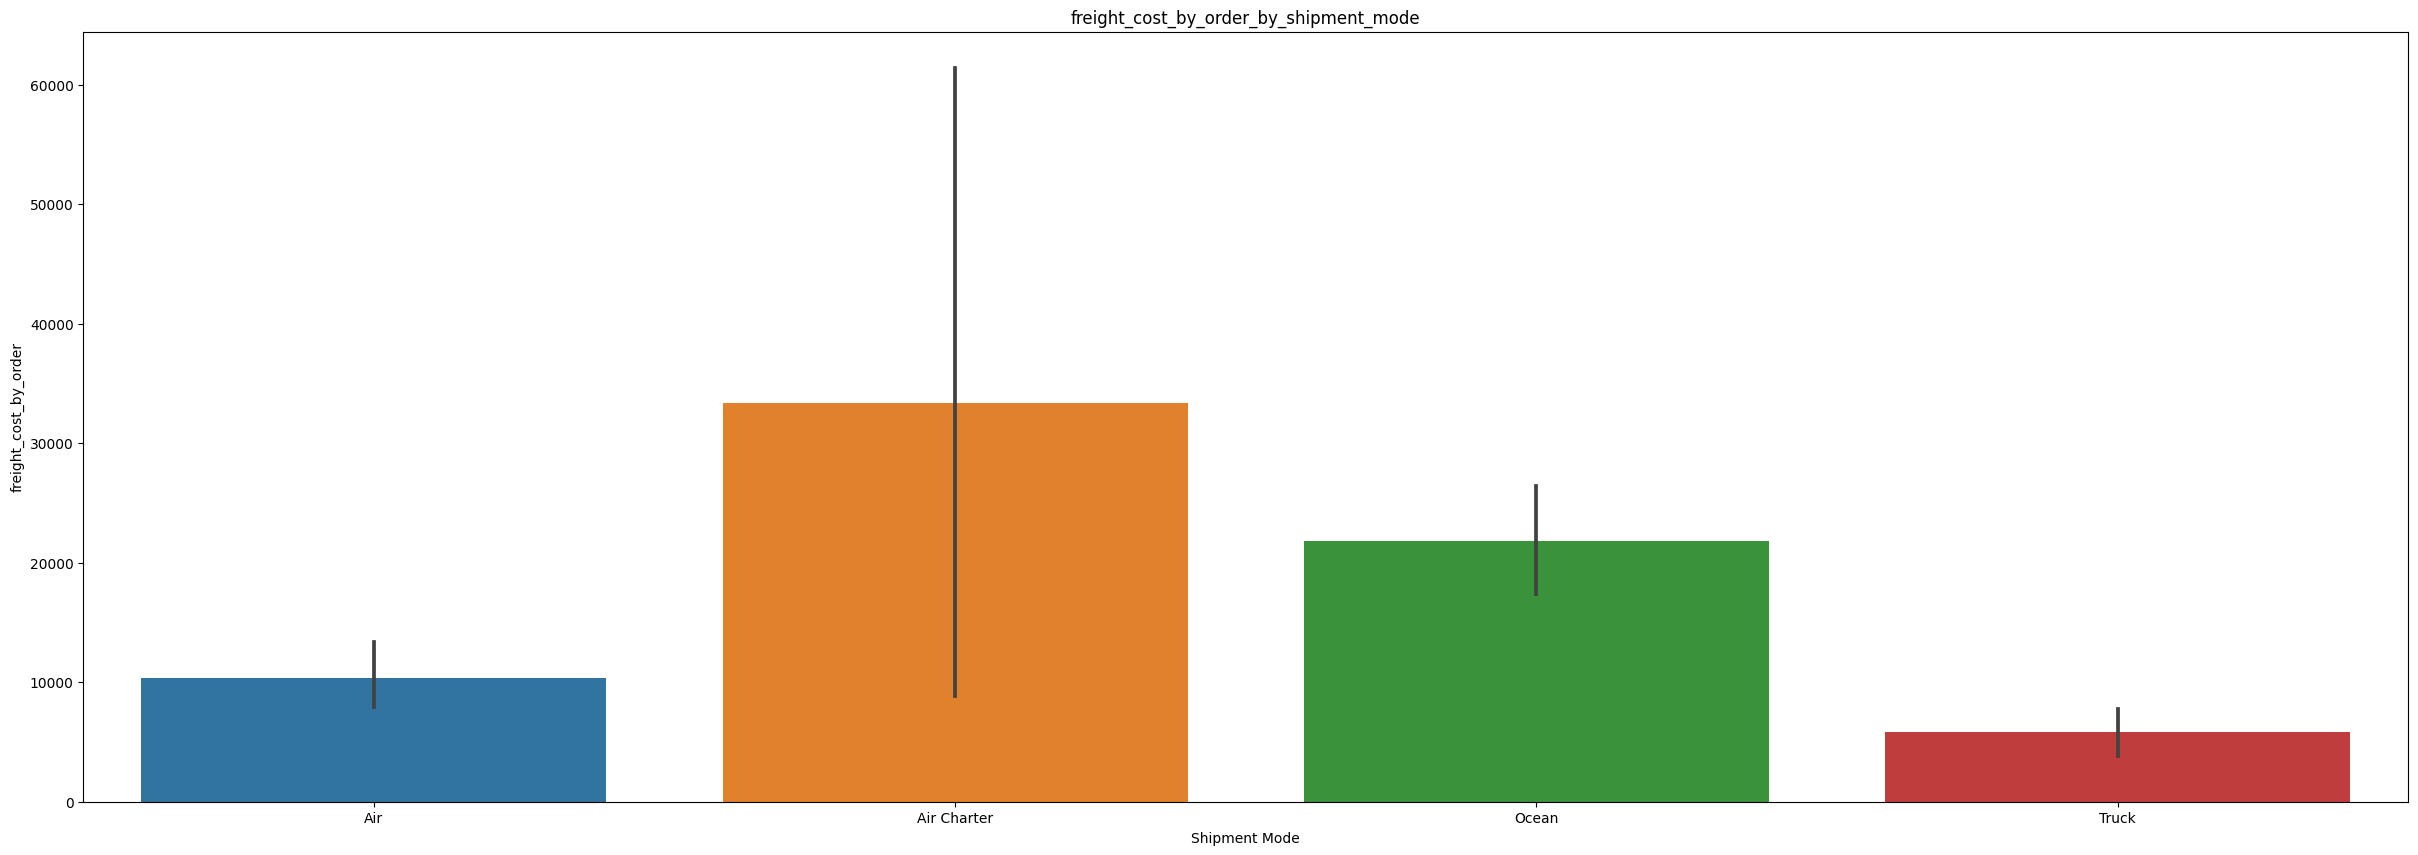

In [41]:
plt.figure(figsize=(30,10))
plt.rc({'font.size':30})
# plt.bar(country_summary.freight_cost_by_order,country_summary.Shipment Mode)
sns.barplot(x='Shipment Mode',y='freight_cost_by_order',data=country_summary)
plt.ylabel('freight_cost_by_order')
plt.xlabel('Shipment Mode')
plt.title('freight_cost_by_order_by_shipment_mode')
plt.show()

Order_by_country

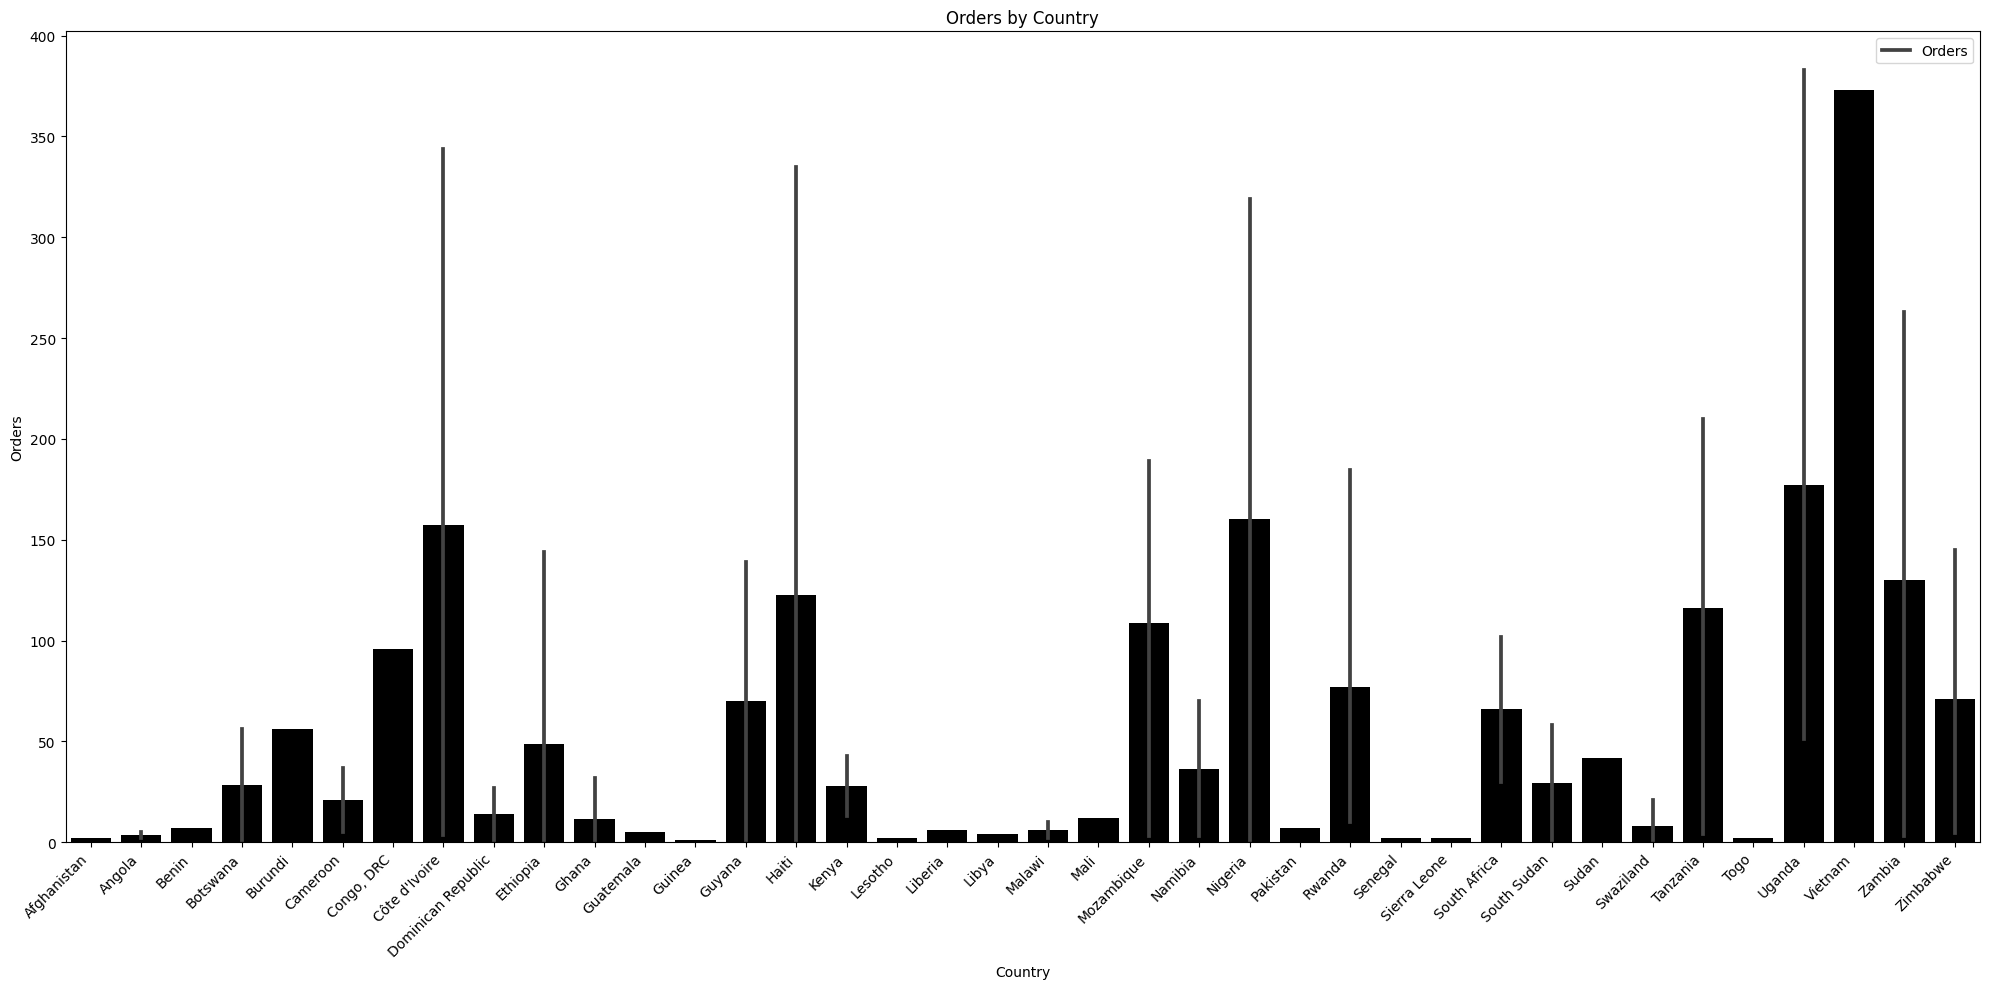

In [42]:
plt.figure(figsize=(20, 10))
plt.rc({'font.size': 18})

sns.barplot(x='Country', y='PO / SO #', data=country_summary, color='black')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Orders')
plt.xlabel('Country')
plt.title('Orders by Country')
plt.legend(['Orders'])  # Add a legend
plt.tight_layout()
plt.show()

This graph is displaying that Vietnam is a highest order country

Top_ten_country_by_freight_cost

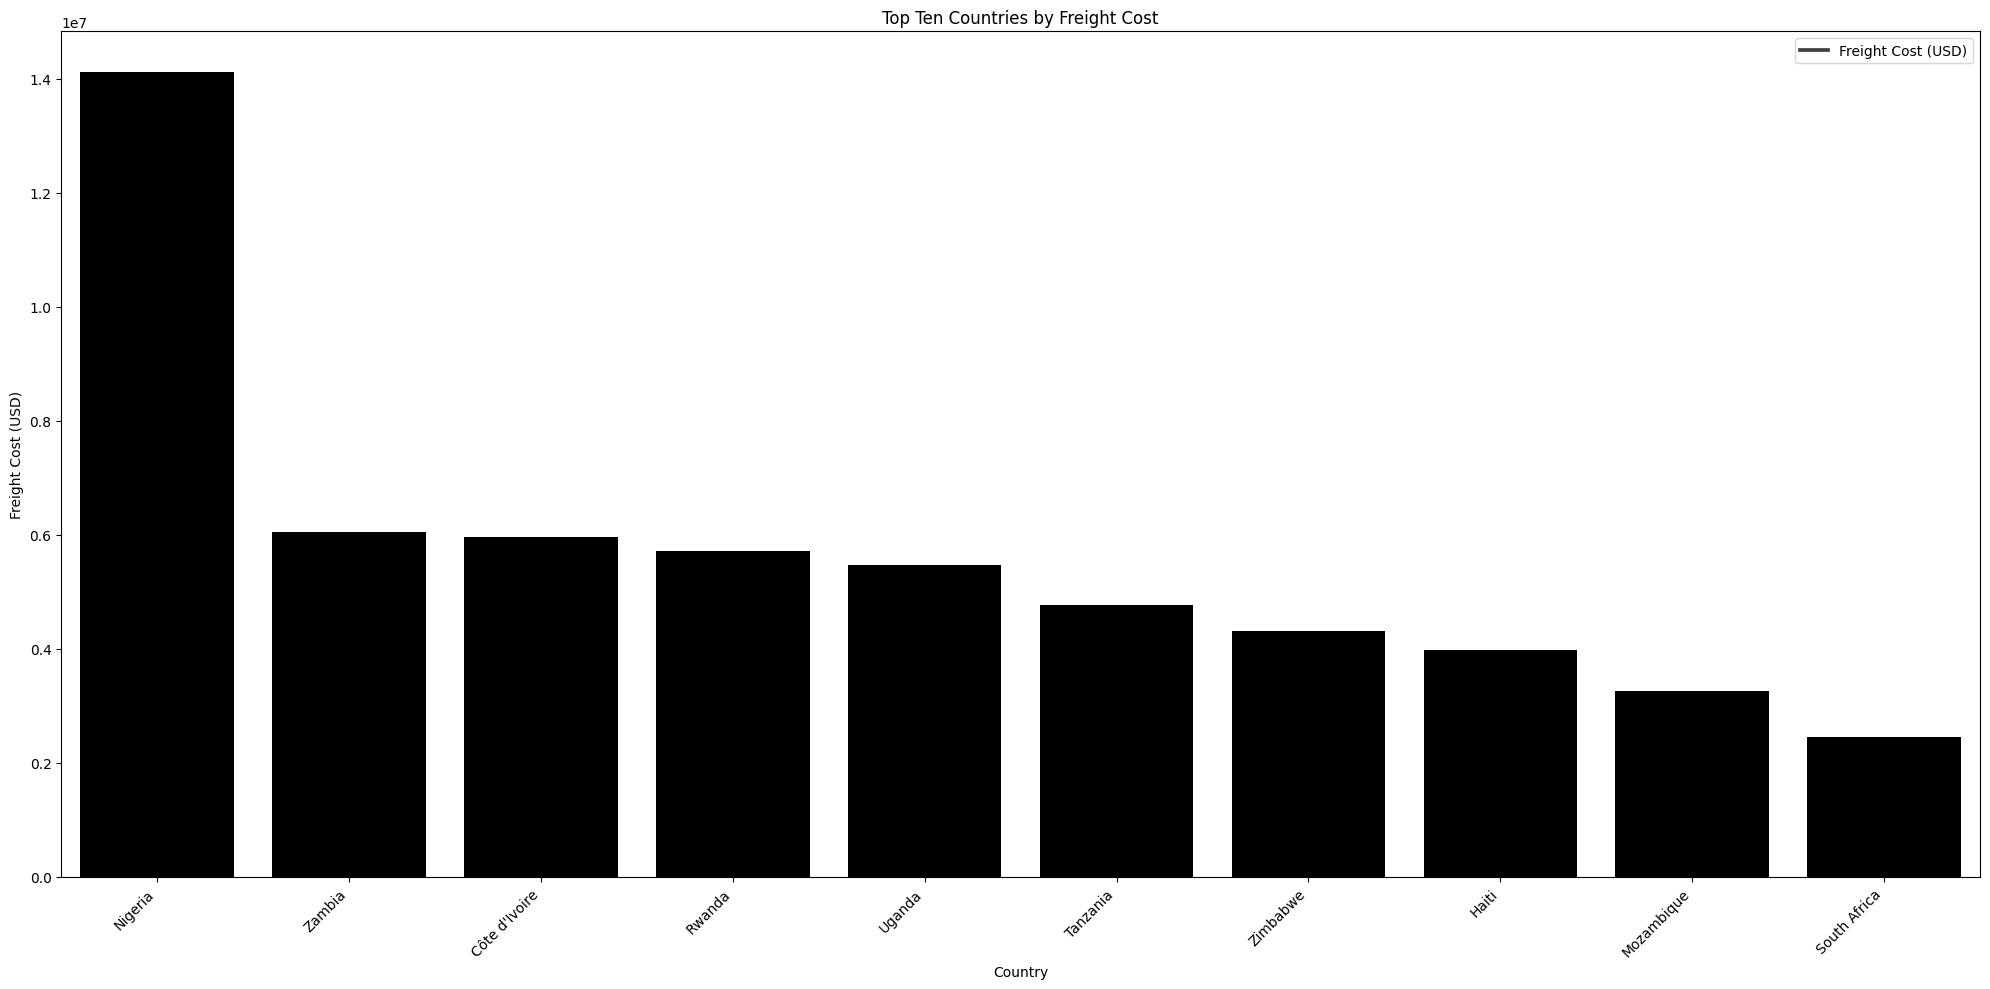

In [43]:
plt.figure(figsize=(20, 10))
plt.rc({'font.size': 18})

sns.barplot(x='Country', y='Freight Cost (USD)', data=top_ten_country_by_freight_cost, color='black')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Country')
plt.title('Top Ten Countries by Freight Cost')
plt.legend(['Freight Cost (USD)'])  # Add a legend
plt.tight_layout()
plt.show()

Here Nigeria is a top country by freight cost

Manufacturing Site by freight cost

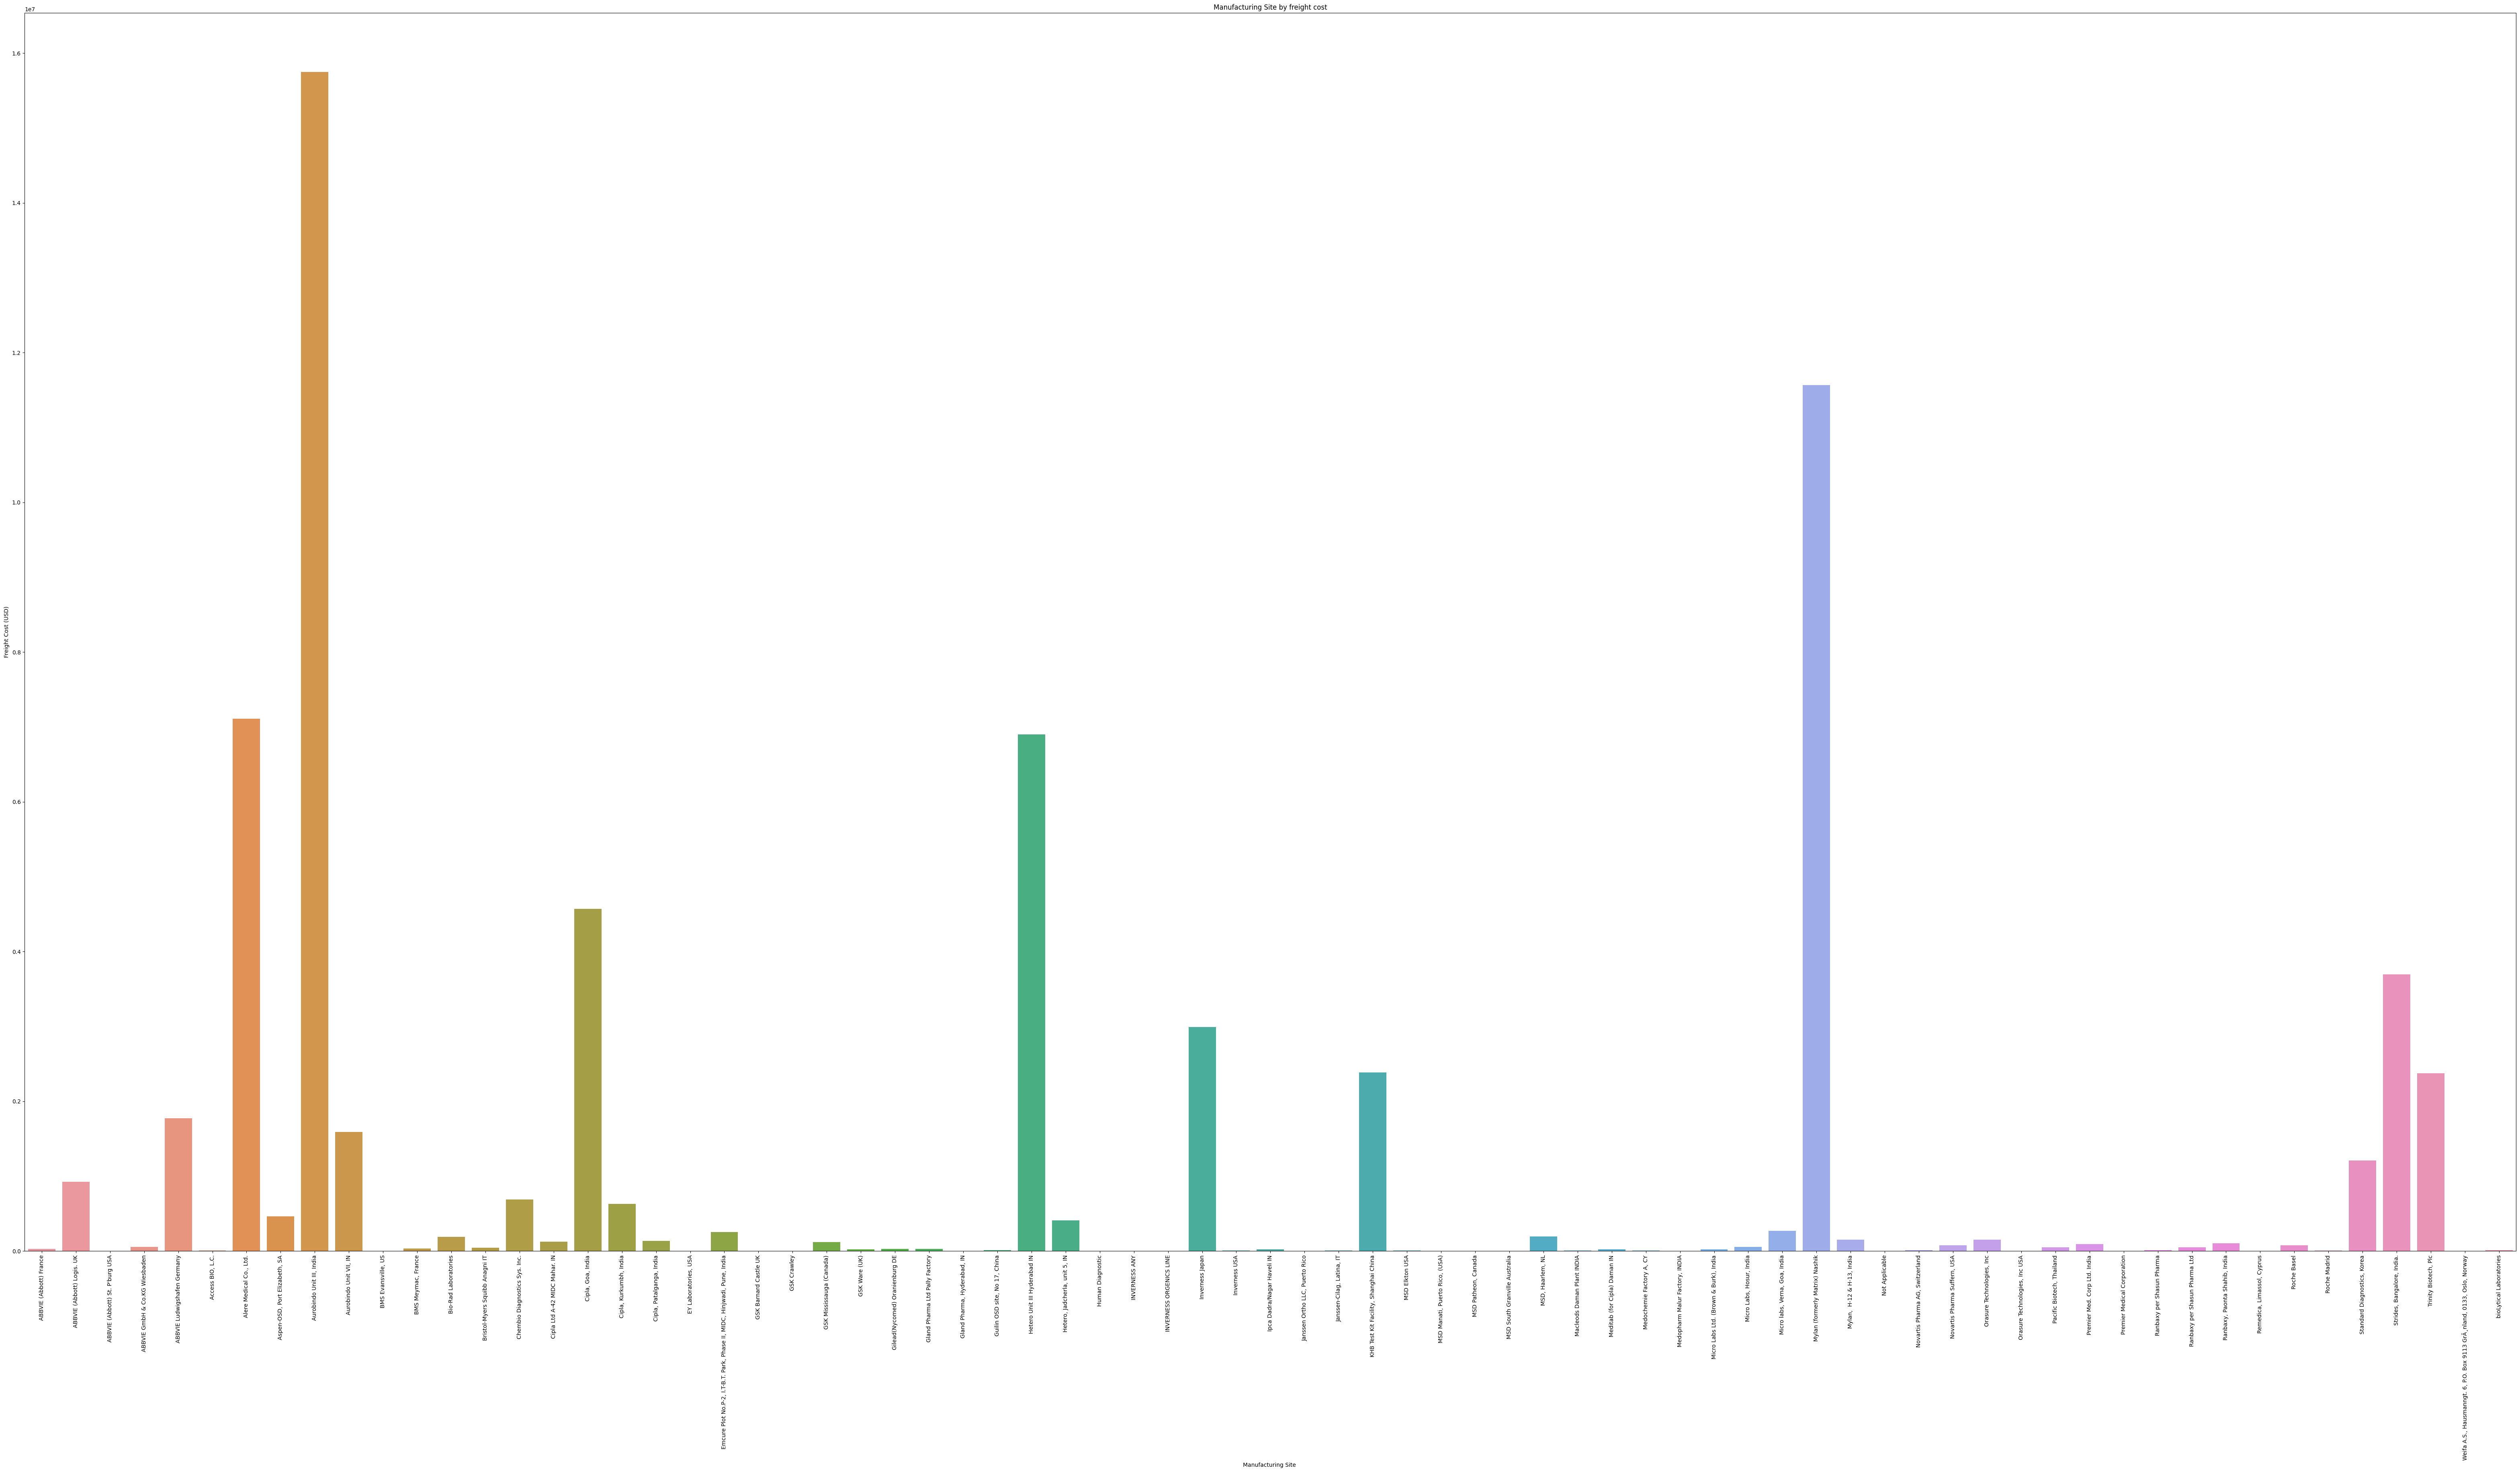

In [44]:
plt.figure(figsize=(80,40))
plt.rc({'font.size':120})
sns.barplot(x='Manufacturing Site',y='Freight Cost (USD)',data=mf_summary)
plt.xticks(rotation='vertical')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Manufacturing Site ')
plt.title('Manufacturing Site by freight cost')
plt.show()

Manufacturing Site by order

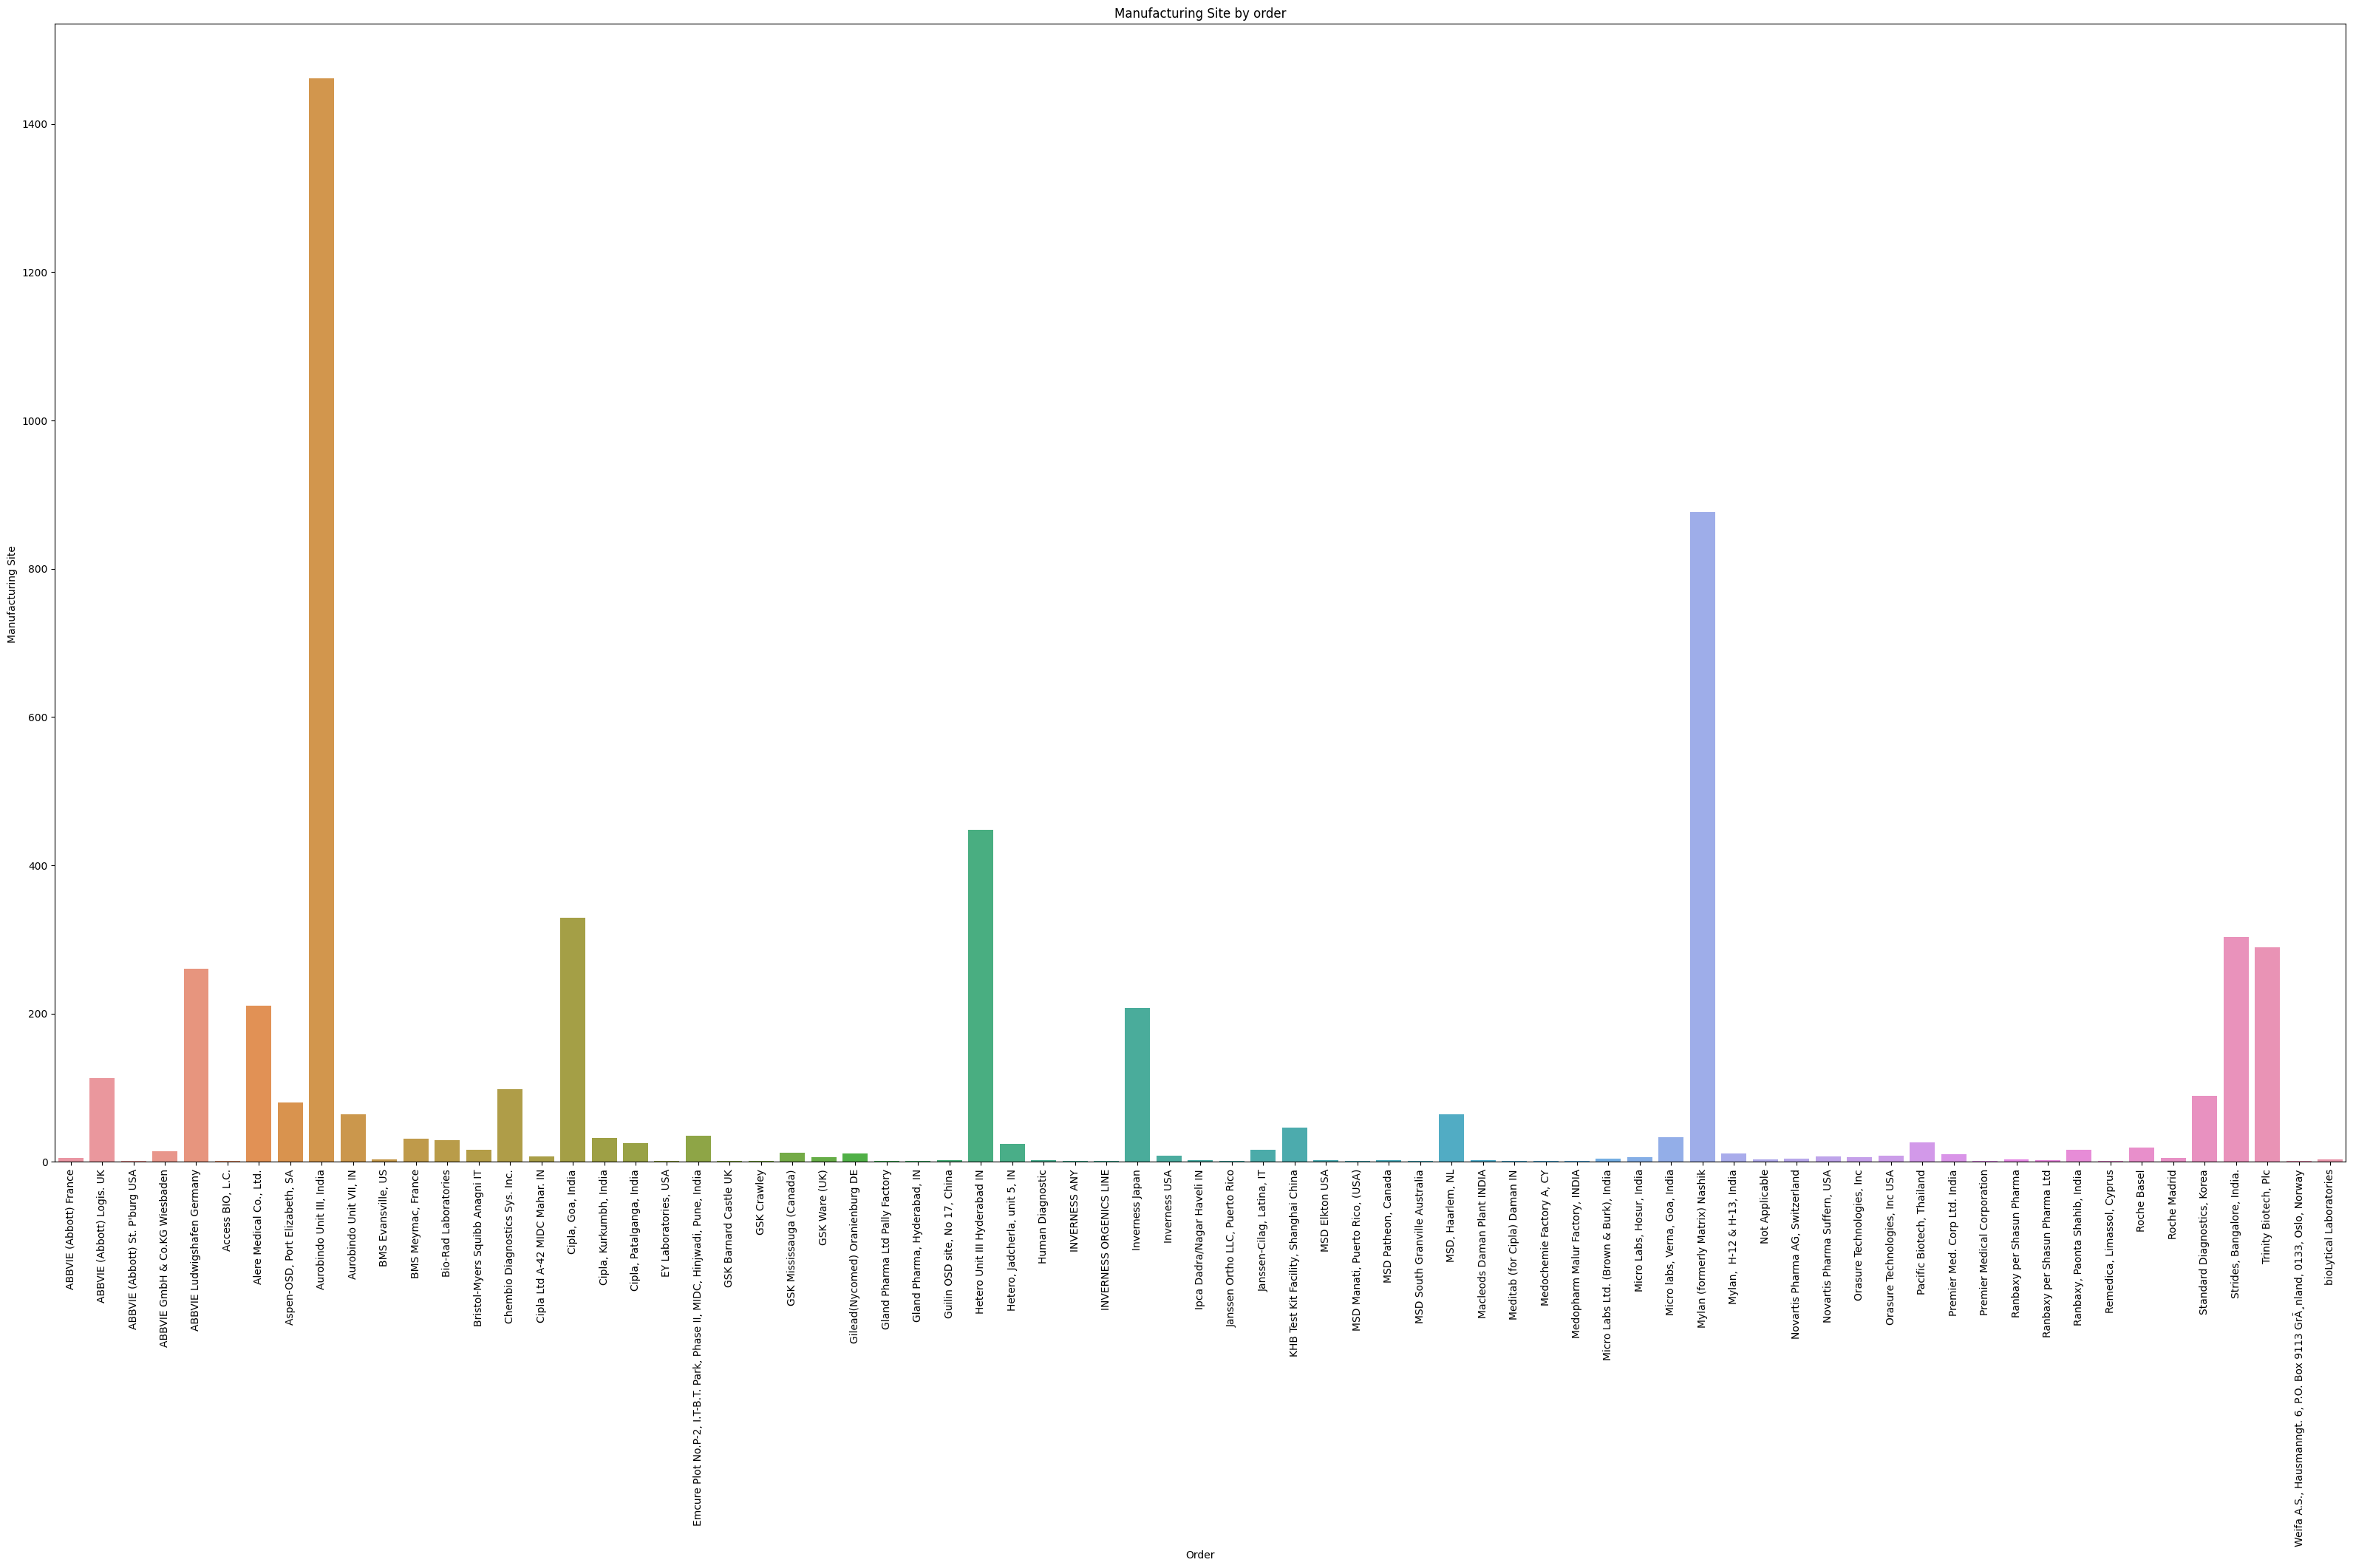

In [45]:
plt.figure(figsize=(40,20))
plt.rc({'font.size':30})
sns.barplot(x='Manufacturing Site',y='PO / SO #',data=mf_summary)
plt.xticks(rotation='vertical')
plt.ylabel('Manufacturing Site ')
plt.xlabel('Order')
plt.title('Manufacturing Site by order')
plt.show()

The above graph is displaying that Aurobindo Unit III,India is highest manufacturing site.

UN NECESSARY DATA REMOVE

In [46]:
X=data.drop(['Pack Price','Unit Price','ID','First Line Designation','Manufacturing Site','Dosage Form','Dosage','Brand','Sub Classification','Product Group','Delivery Recorded Date','Delivered to Client Date','Scheduled Delivery Date','PO Sent to Vendor Date','PQ First Sent to Client Date','Shipment Mode','Vendor INCO Term','Fulfill Via','Managed By','Country','ASN/DN #','PO / SO #','PQ #','Project Code'],axis=1)
data_1=X.copy()
Y1=data['Pack Price']
Y2= data['Unit Price']
X.head(10)
# data_1.head(10)

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,100,1000,80000.0,341,2682.47,128.00
22,240,1000,1920.0,941,4193.49,3.07
23,120,500,41095.0,117,1767.38,65.75
24,100,750,53992.5,171,3518.38,86.39
25,100,25,8750.0,60,3097.85,14.00
26,25,10000,200000.0,3335,27869.74,320.00
27,25,10000,200000.0,3335,28461.10,320.00
28,25,10000,200000.0,3335,28359.80,320.00
29,60,64000,99200.0,4228,12237.61,158.72
30,20,10000,270000.0,3263,20885.78,432.00


DATA SPLITTING

In [47]:
X_train,X_test = train_test_split(X,test_size=0.2,random_state=0)
Y1_train,Y1_test = train_test_split(Y1,test_size=0.2,random_state=0)
Y2_train,Y2_test = train_test_split(Y2,test_size=0.2,random_state=0)

In [48]:
X_train

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10008,30,3360,66931.20,617,2886.92,110.44
5550,120,7000,425740.00,1714,4881.42,437.66
7728,60,11837,153407.52,1319,15459.09,215.08
5665,30,1000,18000.00,133,1604.56,18.50
9117,30,56228,204669.92,6242,17129.96,286.95
...,...,...,...,...,...,...
8043,60,1660,11968.60,90,866.71,25.80
5627,30,70,315.70,6,9951.38,0.52
3059,100,2939,235120.00,1330,13801.89,290.84
4532,30,40593,452611.95,4585,6881.65,559.88


In [81]:
Y1_train

10008    19.92
5550     60.82
7728     12.96
5665     18.00
9117      3.64
         ...  
8043      7.21
5627      4.51
3059     80.00
4532     11.15
4734      8.11
Name: Pack Price, Length: 4793, dtype: float64

In [50]:
Y2_train

10008    0.66
5550     0.51
7728     0.22
5665     0.60
9117     0.12
         ... 
8043     0.12
5627     0.15
3059     0.80
4532     0.37
4734     0.14
Name: Unit Price, Length: 4793, dtype: float64

## FOR PACK PRICE

MODEL FITTING

In [51]:
final_list=[]
final_list2=[]
final_list3=[]
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
result={}
for j in [5, 10, 15, 20,25, 30,35,39]:
        new=[]
       
        for i in model:
            
            
            i.fit(X_train,Y1_train)
            pred=i.predict(X_test)
            rmse = np.sqrt(mean_squared_error(Y1_test, pred))
            new.append(i.score(X_test, Y1_test))
            # scores=(cross_val_score(i,X_train,Y1_train,scoring="neg_mean_squared_error"))
        final_list.append(new)
        # final_list2.append(scores)
        # final_list3.append(r2_score(sc)ores))

SHOW R2_SCORE VALUES IN TABLE

In [52]:
pd.DataFrame(final_list,index=['5', '10', '15', '20', '25', '30','35','39'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,gradient boost
5,0.07226,0.917919,0.857056,0.948955
10,0.07226,0.900472,0.861027,0.949603
15,0.07226,0.889263,0.842167,0.946709
20,0.07226,0.905944,0.833198,0.951255
25,0.07226,0.938625,0.849878,0.948589
30,0.07226,0.932254,0.838907,0.949329
35,0.07226,0.884260,0.855162,0.948320
39,0.07226,0.907370,0.826792,0.950393


SHOW TABLE FOR EVERY REGRESSOR ERROR VALUE 

In [53]:
mse=[]
rms=[]
r2score=[]
all=[]
for i in model:
    i.fit(X_train,Y1_train)
    pred=i.predict(X_test)
    mse.append(mean_squared_error(Y1_test, pred))
    rms.append(np.sqrt(mean_squared_error(Y1_test, pred)))
    r2score.append(r2_score(Y1_test, pred))
all.append(mse)
all.append(rms)
all.append(r2score)

In [84]:
pd.DataFrame(all,index=['MEAN SQUARED ERROR','ROOT MEAN SQUARED ERROR','R2 SCORE'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,gradient boost
MEAN SQUARED ERROR,5.640988,0.290479,0.468252,0.425809
ROOT MEAN SQUARED ERROR,2.375077,0.538961,0.684290,0.652540
R2 SCORE,0.024017,0.949742,0.918985,0.926328


DecisionTreeregressor has best r2_score is approximately 0.95

## FOR UNIT PRICE

MODEL FITTING

In [58]:
final_list=[]
final_list2=[]
final_list3=[]
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
result={}
for j in [5, 10, 15, 20,25, 30,35,39]:
        new=[]
       
        for i in model:
            
            
            i.fit(X_train,Y2_train)
            pred=i.predict(X_test)
            rmse = np.sqrt(mean_squared_error(Y2_test, pred))
            new.append(i.score(X_test, Y2_test))
            # scores=(cross_val_score(i,X_train,Y1_train,scoring="neg_mean_squared_error"))
        final_list.append(new)

SHOW R2_SCORE VALUES IN TABLE

In [59]:
pd.DataFrame(final_list,index=['5', '10', '15', '20', '25', '30','35','39'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,gradient boost
5,0.024017,0.963852,0.924424,0.924110
10,0.024017,0.899011,0.902420,0.922007
15,0.024017,0.963755,0.910115,0.923976
20,0.024017,0.949899,0.914192,0.923217
25,0.024017,0.895459,0.909527,0.925059
30,0.024017,0.963595,0.912774,0.926380
35,0.024017,0.908275,0.914818,0.925400
39,0.024017,0.907393,0.908234,0.924653


SHOW TABLE FOR EVERY REGRESSOR ERROR VALUE 

In [60]:
all=[]
mse=[]
rms=[]
r2score=[]

for i in model:
    i.fit(X_train,Y2_train)
    pred=i.predict(X_test)
    mse.append(mean_squared_error(Y2_test, pred))
    rms.append(np.sqrt(mean_squared_error(Y2_test, pred)))
    r2score.append(r2_score(Y2_test, pred))
all.append(mse)
all.append(rms)
all.append(r2score)

In [61]:
pd.DataFrame(all,index=['MEAN SQUARED ERROR','ROOT MEAN SQUARED ERROR','R2 SCORE'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,gradient boost
MEAN SQUARED ERROR,5.640988,0.290479,0.468252,0.425809
ROOT MEAN SQUARED ERROR,2.375077,0.538961,0.684290,0.652540
R2 SCORE,0.024017,0.949742,0.918985,0.926328


DecisionTreeregressor has best r2_score is approximately 0.95

Here we show that,GradientBoostRegressor is a best model for pack price and DecisionTreeRegressor for unit price. So we predict unit price and pack price with the help of this model.

## SAVING MODEL

FOR PACK PRICE

In [82]:
array1=np.array(X_train)
regressor = DecisionTreeRegressor()
regressor.fit(array1, Y1_train)
joblib.dump(regressor, 'model1.pkl')

# Load the saved model from the file
loaded_regressor = joblib.load('model1.pkl')


FOR UNIT PRICE

In [65]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import joblib
array2=np.array(X_train)
regressor = DecisionTreeRegressor()
regressor.fit(array2, Y2_train)
# Save the trained model to a file
joblib.dump(regressor, 'model2.pkl')

# Load the saved model from the file
loaded_regressor = joblib.load('model2.pkl')


## LOADING MODEL

FOR PACK PRICE

In [83]:
model = joblib.load('model1.pkl')

# Make predictions
#print(model.predict([[30, 3360, 66931.20, 617, 2886.92, 110.44]]))

#model=GradientBoostingRegressor()
#model.load_model('model1.pkl')
print(model.predict([[30,3360,66931.20,617,2886.92,110.44]]))

[19.92]


FOR UNIT PRCIE

In [80]:
model = joblib.load('model2.pkl')
print(model.predict([[30,3360,66931.20,617,2886.92,110.44]]))

[0.66]
